In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# read and clean data by removing unwanted text and spaces
data = pd.read_csv("data/exp9_20200918_pixel2", header=None)

strToRemove = [
    "from onCreate",
    "from MainActivity onCreate",
    "onCreate MainActivity",
    "onCreate Service",
    "onStartCommand Service",
    "onTaskRemoved Service",
    "onDestroy Service",
]
for str in strToRemove:
    data[0] = data[0].str.replace(str, "")
data[0] = data[0].str.strip()

data["timestamp"] = pd.to_datetime(data[0], format="%d %b %Y %H:%M:%S:%f")

In [104]:
group1min = data.groupby(pd.Grouper(key="timestamp",freq="1min")).count()
group5min = data.groupby(pd.Grouper(key="timestamp",freq="5min")).count()
# rename the column name to count
group1min.rename( columns={0: "count"}, inplace=True)
group5min.rename( columns={0: "count"}, inplace=True)

len(group1min["count"].value_counts())
len(group5min["count"].value_counts())

4

In [116]:
# calculate results for 1 minute intervals
g1_total_rows = len(group1min)
g1_misses = group1min["count"].value_counts().get(0,0) # get value for key 0, if it doesnt exist we return 0 which means 
g1_score = (g1_total_rows - g1_misses)/g1_total_rows
print(g1_score)
# group1min.loc[group1min["count"] == 0]

0.9990909090909091


In [124]:
# calculate results for 5 minute intervals
g5_total_rows = len(group5min)
g5_misses = group5min["count"].value_counts().get(0, 0) # get value for key 0, if it doesnt exist we return 0 which means no misses.
g5_score = (g5_total_rows - g5_misses)/g5_total_rows
print(g5_score)

1.0


Looking at data from 18 Sep 2020 19:58:27:399 to 19 Sep 2020 14:17:29:410
1 min intervals: 99.91% missing 1 intervals
5 min intervals: 92.15% missing 23 intervals


Text(0.5, 1.0, 'Experiment 4 - 16 Sept 10:14pm to 17 Sept 7:05pm')

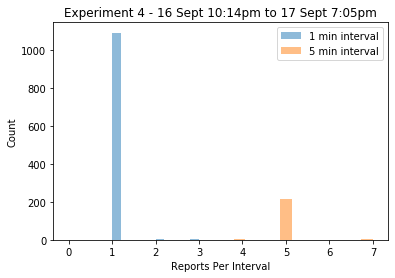

In [107]:
print("Looking at data from", data[0].iloc[0] , "to" , data[0].iloc[-1])
print("1 min intervals:", "{0:.2%}".format(g1_score) , "missing" , g1_misses , "intervals")
print("5 min intervals:", "{0:.2%}".format(g5_score) , "missing" , g5_misses , "intervals")

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(group1min.values, bins=15, alpha=.5)
_ = ax.hist(group5min.values, bins=15, alpha=.5)
ax.legend(["1 min interval", "5 min interval"])
ax.set_xlabel("Reports Per Interval")
ax.set_ylabel("Count")
ax.set_title("Experiment 4 - 16 Sept 10:14pm to 17 Sept 7:05pm")